### Putri Roro Andini (09020622037) Kode : 3.2

# 1. Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oiandin","key":"a3cc1c2325044924f362a69de4f84807"}'}

In [ ]:
import os
os.makedirs('/content/sample_data/umap_test', exist_ok=True)
os.rename('kaggle.json', '/content/sample_data/umap_test/kaggle.json')

In [ ]:
!pip install kaggle

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
api = KaggleApi()
dataset = 'utkarshshrivastav07/product-sales-and-marketing-analytics-dataset'
api.dataset_download_files(dataset, path='./content/drive/MyDrive/Colab', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/utkarshshrivastav07/product-sales-and-marketing-analytics-dataset


In [ ]:
import pickle

In [ ]:
from sklearn.manifold import trustworthiness

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import random as rd

UMAP (Uniform Manifold Approximation and Projection) = Metode Pengurangan Dimensi

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
from umap import UMAP

# 2. Dataset + Visualization

In [ ]:
file_path = '/content/drive/MyDrive/Colab/dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Product_Name,Category,Sub_category,Price,Rating,No_rating,Discount,M_Spend,Supply_Chain_E,Sales_y,Sales_m,Market_T,Seasonality_T,Success_Percentage
0,0,Non-stick Pan,Home & Kitchen,Cookware,669.23,1.6,3682,29.37,8654.97,50.76,95655,7587,0.44,4.20,59.348799
1,1,Tent,Sports & Outdoors,Outdoor Gear,67.13,3.2,2827,5.97,1918.00,90.22,41371,5555,-1.25,4.24,42.838493
2,2,Mascara,Beauty & Health,Makeup,463.25,3.5,4554,41.19,5885.23,87.81,97015,9716,-3.40,-9.75,83.379924
3,3,Cutlery Set,Home & Kitchen,Cookware,1499.18,2.9,4976,46.97,7984.91,78.10,32454,3697,-0.23,-6.62,43.678419
4,4,Blender,Home & Kitchen,Appliances,640.43,2.4,3806,47.16,7846.50,95.87,38213,5136,-4.80,-8.61,49.180016


In [ ]:
df.shape

(500, 15)

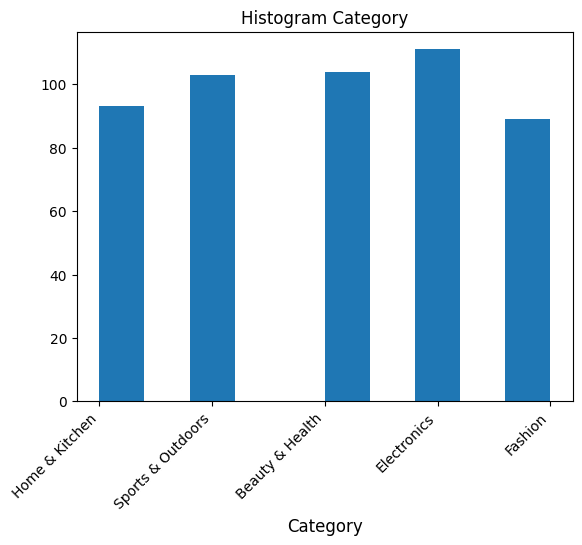

In [ ]:
plt.hist(df['Category'])
plt.title("Histogram Category")
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

#3. Data Preprocessing + Visualization

cek apakah ada yang nol

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

Missing values per kolom:
 Unnamed: 0            0
Product_Name          0
Category              0
Sub_category          0
Price                 0
Rating                0
No_rating             0
Discount              0
M_Spend               0
Supply_Chain_E        0
Sales_y               0
Sales_m               0
Market_T              0
Seasonality_T         0
Success_Percentage    0
dtype: int64


In [ ]:
data_cleaned = df.drop(columns=['Unnamed: 0', 'Product_Name'])
data_preprocessed = pd.get_dummies(data_cleaned, columns=['Category', 'Sub_category'], drop_first=True)
df.head()

,Unnamed: 0,Product_Name,Category,Sub_category,Price,Rating,No_rating,Discount,M_Spend,Supply_Chain_E,Sales_y,Sales_m,Market_T,Seasonality_T,Success_Percentage
0,0,Non-stick Pan,Home & Kitchen,Cookware,669.23,1.6,3682,29.37,8654.97,50.76,95655,7587,0.44,4.20,59.348799
1,1,Tent,Sports & Outdoors,Outdoor Gear,67.13,3.2,2827,5.97,1918.00,90.22,41371,5555,-1.25,4.24,42.838493
2,2,Mascara,Beauty & Health,Makeup,463.25,3.5,4554,41.19,5885.23,87.81,97015,9716,-3.40,-9.75,83.379924
3,3,Cutlery Set,Home & Kitchen,Cookware,1499.18,2.9,4976,46.97,7984.91,78.10,32454,3697,-0.23,-6.62,43.678419
4,4,Blender,Home & Kitchen,Appliances,640.43,2.4,3806,47.16,7846.50,95.87,38213,5136,-4.80,-8.61,49.180016


<Figure size 1500x1000 with 0 Axes>

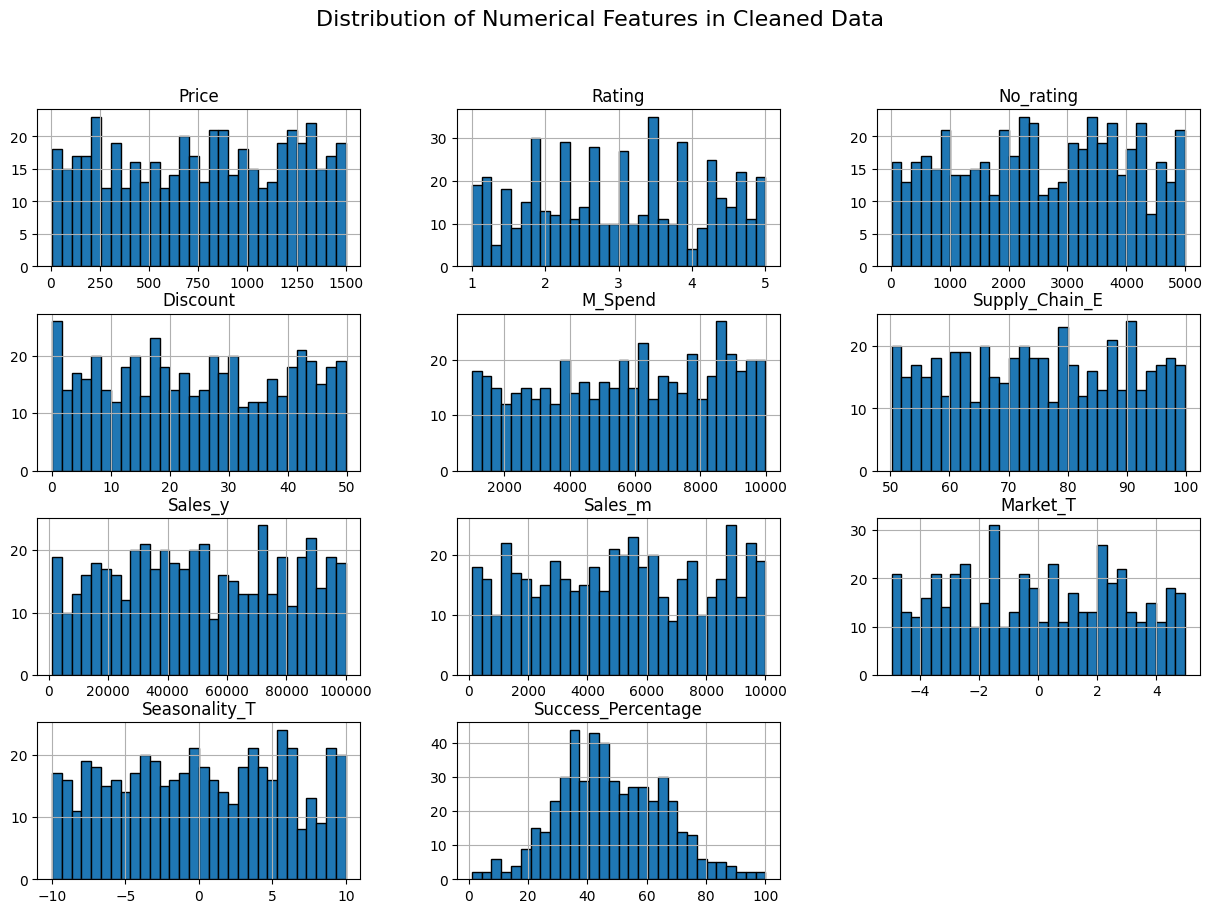

In [ ]:
plt.figure(figsize=(15, 10))
data_cleaned.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features in Cleaned Data', fontsize=16)
plt.show()

# 4. Modeling (Training, Validation & Testing) + Evaluation

In [ ]:
umap_model = UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', n_components=2, random_state=42)

In [ ]:
data_umap = umap_model.fit_transform(data_preprocessed)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<ipython-input-25-06aa158addde>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_umap[:, 0], data_umap[:, 1], s=10, alpha=0.7, cmap='Spectral')


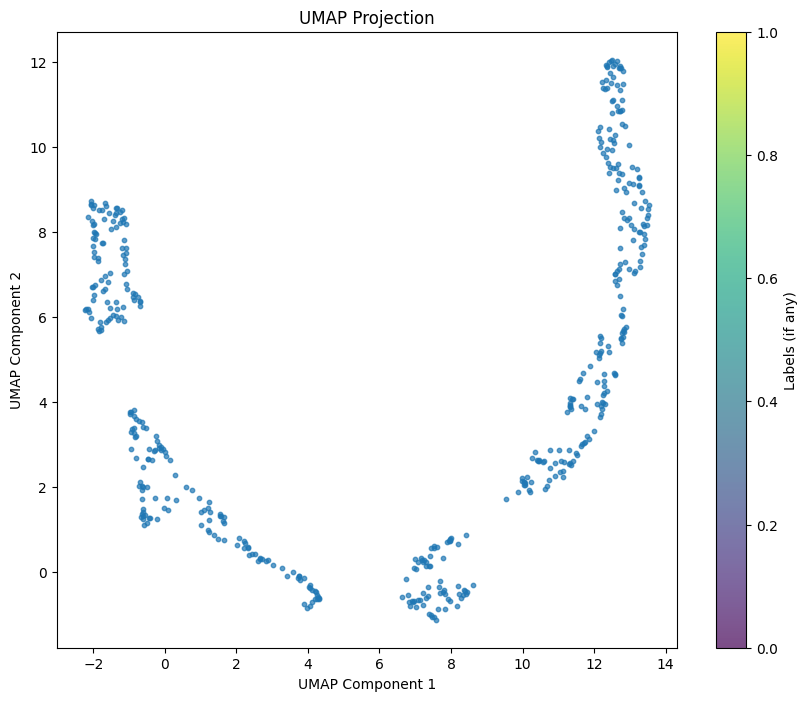

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data_umap[:, 0], data_umap[:, 1], s=10, alpha=0.7, cmap='Spectral')
plt.title("UMAP Projection")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.colorbar(label="Labels (if any)")
plt.show()

In [ ]:
trust = trustworthiness(data_umap, data_preprocessed, n_neighbors=15)
print(f"Trustworthiness: {trust:.4f}")

Trustworthiness: 0.9869


In [ ]:
features = ["Rating", "M_Spend", "Supply_Chain_E", "Sales_m"]
target = "Success_Percentage"

X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model regresi
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 186.80


In [ ]:
threshold = np.median(y_pred) # Example threshold. You can adjust it based on your specific problem.
y_pred_class = (y_pred >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.73


In [ ]:
# Print classification report (precision, recall, f1-score, support)
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71        43
           1       0.80      0.70      0.75        57

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



In [ ]:
# Display confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[33 10]
 [17 40]]


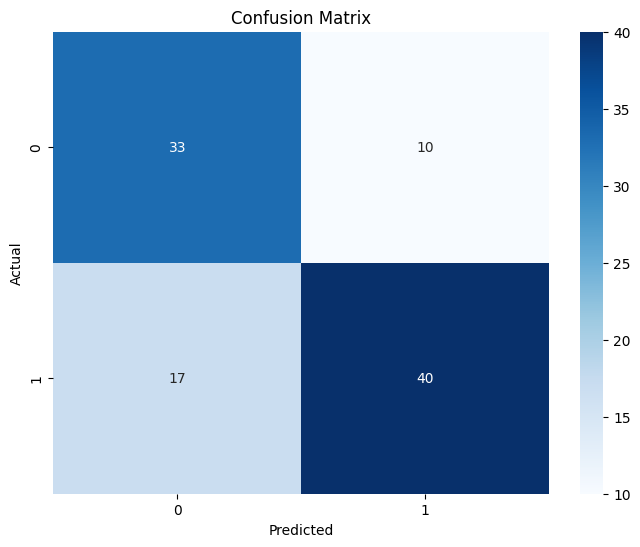

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 5. Inferences + Example Input

In [ ]:
with open("/content/drive/My Drive/success_percentage_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model berhasil disimpan di Google Drive sebagai 'success_percentage_model.pkl'.")

Model berhasil disimpan di Google Drive sebagai 'success_percentage_model.pkl'.


In [ ]:
# load model
pickle_file_path = "/content/drive/My Drive/success_percentage_model.pkl"

In [ ]:
def predict_success_percentage(new_data, pickle_file_path):
    # Muat model
    with open(pickle_file_path, "rb") as file:
        model = pickle.load(file)

    # Prediksi
    predicted_success = model.predict(new_data)
    return predicted_success

In [ ]:
pickle_file_path = "/content/drive/My Drive/success_percentage_model.pkl"

def predict_success_percentage(new_data, pickle_file_path):
    with open(pickle_file_path, "rb") as file:
        model = pickle.load(file)
    predicted_success = model.predict(new_data)
    return predicted_success

num_samples = 10  # You can change the number of samples
dummy_data = pd.DataFrame({
    "Rating": [rd.uniform(1, 5) for _ in range(num_samples)],
    "M_Spend": [rd.uniform(1000, 5000) for _ in range(num_samples)],
    "Supply_Chain_E": [rd.uniform(0.5, 1.5) for _ in range(num_samples)],
    "Sales_m": [rd.uniform(10000, 50000) for _ in range(num_samples)],
})

# Predict success percentage for the random data
predicted_success = predict_success_percentage(dummy_data[["Rating", "M_Spend", "Supply_Chain_E", "Sales_m"]], pickle_file_path)
dummy_data["Success_Percentage"] = predicted_success

dummy_data

,Rating,M_Spend,Supply_Chain_E,Sales_m,Success_Percentage
0,1.916057,4009.485549,0.845687,36523.163414,47.415448
1,2.448352,1481.313144,0.575693,45451.146629,50.105574
2,4.141718,3960.527451,0.989626,20657.831819,62.153450
3,3.486914,4984.966222,1.179807,37320.014651,55.411708
4,3.973899,1886.636323,1.101098,27578.649184,58.363580
5,4.328027,1125.051172,0.988148,11644.886088,57.265735
6,2.283491,3812.399749,1.437357,17251.750746,48.472613
7,3.882118,1199.921074,0.549449,37119.285223,52.271039
8,4.045398,4155.549418,1.489062,25202.916779,61.515743
9,1.896843,1804.807793,1.480795,12854.749757,47.785732


In [ ]:
df[['Rating','M_Spend', 'Supply_Chain_E', 'Sales_m', 'Success_Percentage']].tail(10)

,Rating,M_Spend,Supply_Chain_E,Sales_m,Success_Percentage
490,4.3,9785.09,90.07,8964,91.802342
491,4.1,9313.76,53.06,9442,74.789330
492,4.6,3869.40,67.34,6564,34.398292
493,1.0,6040.93,83.87,6927,35.170830
494,2.1,1651.24,86.21,6419,41.572536
495,1.9,8346.43,61.57,2141,28.358934
496,3.4,6602.16,76.98,7348,46.235138
497,3.4,2795.49,67.29,9946,52.084381
498,2.7,2155.10,55.97,3866,50.698501
499,4.6,3999.71,62.39,8849,71.015511


In [ ]:
rating = float(input("Masukkan Rating: "))
m_spend = float(input("Masukkan Marketing Spend (M_Spend): "))
supply_chain_e = float(input("Masukkan Supply Chain Efficiency (Supply_Chain_E): "))
sales_m = float(input("Masukkan Sales Margin (Sales_m): "))

new_data = pd.DataFrame({
    "Rating": [rating],
    "M_Spend": [m_spend],
    "Supply_Chain_E": [supply_chain_e],
    "Sales_m": [sales_m]
})

predicted_success = predict_success_percentage(new_data, pickle_file_path)
print(f"Predicted Success Percentage: {predicted_success[0]:.2f}")

# Add the new data to the original dataframe
new_data['Success_Percentage'] = predicted_success
result_df = pd.concat([df, new_data], ignore_index=True)

print("\nHasil Prediksi:")
print(result_df.tail())

Masukkan Rating: 4.6
Masukkan Marketing Spend (M_Spend): 3999.71
Masukkan Supply Chain Efficiency (Supply_Chain_E): 62.39
Masukkan Sales Margin (Sales_m): 8849
Predicted Success Percentage: 67.60

Hasil Prediksi:
     Unnamed: 0 Product_Name           Category  Sub_category    Price  \
496       496.0   GoPro Hero        Electronics       Cameras  1154.40   
497       497.0        Heels            Fashion      Footwear   634.27   
498       498.0       iPhone        Electronics   Smartphones  1221.19   
499       499.0         Tent  Sports & Outdoors  Outdoor Gear  1418.86   
500         NaN          NaN                NaN           NaN      NaN   

     Rating  No_rating  Discount  M_Spend  Supply_Chain_E  Sales_y  Sales_m  \
496     3.4     1007.0     34.21  6602.16           76.98  19356.0   7348.0   
497     3.4     3512.0     14.10  2795.49           67.29  39760.0   9946.0   
498     2.7      726.0     48.76  2155.10           55.97  81909.0   3866.0   
499     4.6     1841.0    

In [ ]:
prediksi_baru = result_df['Success_Percentage'].iloc[-1]
prediksi_sebenarnya = result_df['Success_Percentage'].iloc[-2]
selisih = prediksi_baru - prediksi_sebenarnya
print(f"Prediksi baru: {prediksi_baru} | Prediksi sebenarnya: {prediksi_sebenarnya} | Selisih: {selisih}")

Prediksi baru: 67.59864387901759 | Prediksi sebenarnya: 71.01551052873762 | Selisih: -3.416866649720035
